In [1]:
pwd

'c:\\Users\\daint\\OneDrive\\Desktop\\Organic_Market_Location_Visualizer\\static\\ipynb'

In [2]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read json file - SocioEconomic Status - MD. Time Period is from 2012-2016.  
url = "https://opendata.maryland.gov/resource/is7h-kp6x.json"
response = requests.get(url)

# Print status code
print(response.status_code)

200


In [4]:
requests.get(url).json()
data = response.json()
print(json.dumps(data, indent=4))

[
    {
        "jurisdictions": "Allegany County",
        "total_households": "27759",
        "population_25_years_and_older": "50489",
        "less_than_9th_grade": "1307",
        "high_school_no_diploma": "4002",
        "high_school_diploma": "21070",
        "some_college_no_degree": "10154",
        "associates_degree": "4758",
        "bachelor_s_degree": "4888",
        "graduate_or_professional": "4310",
        "employment_status_of_the_population_16_years_and_over": "61337",
        "civilian_labor_force_16_years_over": "31591",
        "employed": "28738",
        "unemployed": "2853",
        "unemployment_rate": "9.0",
        "commute_workers_16_yrs_and_over": "28108",
        "percent_drove_alone": "82.5",
        "percent_carpooled": "9.7",
        "percent_public_transportation": "0.5",
        "percent_walked": "4.4",
        "percent_other": "1.2",
        "percent_worked_at_home": "1.7",
        "median_household_income": "42771",
        "families": "17126",
 

In [5]:
MD_df = pd.DataFrame(data)
MD_df.head()
# MD_df.shape

,jurisdictions,total_households,population_25_years_and_older,less_than_9th_grade,high_school_no_diploma,high_school_diploma,some_college_no_degree,associates_degree,bachelor_s_degree,graduate_or_professional,...,male,female,white_alone,black_alone,asian_alone,american_indian_alaska_native_alone,native_hawaiian_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino_of_any_race
0,Allegany County,27759,50489,1307,4002,21070,10154,4758,4888,4310,...,37892,34699,64164,5899,594,120,24,210,1580,1257
1,Anne Arundel County,205395,387306,9133,21910,93676,77911,29279,90536,64861,...,279581,285019,417111,91567,20818,1025,408,13095,20576,41275
2,Baltimore County,312859,573263,18315,32698,152622,112480,40355,125363,91430,...,392930,435707,514340,231516,49045,2320,398,8728,22290,42438
3,Calvert County,31462,61269,1096,2716,18833,15552,4642,10564,7866,...,45184,45640,73885,10797,1504,150,34,541,3913,3276
4,Caroline County,11996,22216,1230,2470,9079,4072,1687,2182,1496,...,15971,16814,26338,4376,190,96,18,721,1046,2247


In [6]:
MD_df.columns

Index(['jurisdictions', 'total_households', 'population_25_years_and_older',
       'less_than_9th_grade', 'high_school_no_diploma', 'high_school_diploma',
       'some_college_no_degree', 'associates_degree', 'bachelor_s_degree',
       'graduate_or_professional',
       'employment_status_of_the_population_16_years_and_over',
       'civilian_labor_force_16_years_over', 'employed', 'unemployed',
       'unemployment_rate', 'commute_workers_16_yrs_and_over',
       'percent_drove_alone', 'percent_carpooled',
       'percent_public_transportation', 'percent_walked', 'percent_other',
       'percent_worked_at_home', 'median_household_income', 'families',
       'percent_families_in_poverty',
       'percent_civilian_population_w_health_ins_cov', 'total_housing_units',
       'percent_occupied', 'percent_vacant', 'total_population',
       'voting_age_population', 'male', 'female', 'white_alone', 'black_alone',
       'asian_alone', 'american_indian_alaska_native_alone',
       'native_h

In [7]:
MD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 41 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   jurisdictions                                          24 non-null     object
 1   total_households                                       24 non-null     object
 2   population_25_years_and_older                          24 non-null     object
 3   less_than_9th_grade                                    24 non-null     object
 4   high_school_no_diploma                                 24 non-null     object
 5   high_school_diploma                                    24 non-null     object
 6   some_college_no_degree                                 24 non-null     object
 7   associates_degree                                      24 non-null     object
 8   bachelor_s_degree                                      24 non-

In [8]:
# Create new df with selected columns
MD_df = MD_df[["jurisdictions", "total_households", "median_household_income", "families", 
                   "total_population", "male", "female"]]
MD_df.head()

,jurisdictions,total_households,median_household_income,families,total_population,male,female
0,Allegany County,27759,42771,17126,72591,37892,34699
1,Anne Arundel County,205395,94502,142696,564600,279581,285019
2,Baltimore County,312859,71810,204288,828637,392930,435707
3,Calvert County,31462,100350,23759,90824,45184,45640
4,Caroline County,11996,52469,8670,32785,15971,16814


In [9]:
MD_df.dtypes

jurisdictions              object
total_households           object
median_household_income    object
families                   object
total_population           object
male                       object
female                     object
dtype: object

In [10]:
# Convert object types to int for calculation
MD_df['jurisdictions'] = MD_df['jurisdictions'].astype(str)
MD_df['total_households'] = MD_df['total_households'].astype(str).astype(int)
MD_df['median_household_income'] = MD_df['median_household_income'].astype(str).astype(int)
MD_df['families'] = MD_df['families'].astype(str).astype(int)
MD_df['total_population'] = MD_df['total_population'].astype(str).astype(int)
MD_df['male'] = MD_df['male'].astype(str).astype(int)
MD_df['female'] = MD_df['female'].astype(str).astype(int)                                                  

In [11]:
# # total_households.dtype
# # median_household_income.dtype
# # jurisdictions.dtype
# # families.dtype
# # total_population.dtype
# # male.dtype
# female.dtype
# # jurisdictions.dtype

In [12]:
MD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   jurisdictions            24 non-null     object
 1   total_households         24 non-null     int32 
 2   median_household_income  24 non-null     int32 
 3   families                 24 non-null     int32 
 4   total_population         24 non-null     int32 
 5   male                     24 non-null     int32 
 6   female                   24 non-null     int32 
dtypes: int32(6), object(1)
memory usage: 896.0+ bytes


In [13]:
# rename jurisdictions to county name
MD_df = MD_df.rename(columns={"jurisdictions": "county_name"})
MD_df.head()

,county_name,total_households,median_household_income,families,total_population,male,female
0,Allegany County,27759,42771,17126,72591,37892,34699
1,Anne Arundel County,205395,94502,142696,564600,279581,285019
2,Baltimore County,312859,71810,204288,828637,392930,435707
3,Calvert County,31462,100350,23759,90824,45184,45640
4,Caroline County,11996,52469,8670,32785,15971,16814


In [14]:
# Calculate sum of total households
sum_total_households = MD_df['total_households'].sum()
sum_total_households

2181093

In [15]:
# Calculate min, max of median_household_income

In [16]:
# Calculate sum of total families
sum_families = MD_df['families'].sum()
sum_families

1460186

In [17]:
# Calculate sum of total population
sum_total_population = MD_df['total_population'].sum()
sum_total_population

5996079

In [18]:
# Calculate sum of total male
sum_male = MD_df['male'].sum()
sum_male

2906277

In [19]:
# Calculate sum of total female
sum_female = MD_df['female'].sum()
sum_female

3089802

In [20]:
# Set x axis and tick locations
x_axis = np.arange(len(MD_df))
tick_locations = [value for value in x_axis]

([<matplotlib.axis.XTick at 0x28ab7d5bd30>,
 [Text(0, 0, 'Allegany County'),
  Text(1, 0, 'Anne Arundel County'),
  Text(2, 0, 'Baltimore County'),
  Text(3, 0, 'Calvert County'),
  Text(4, 0, 'Caroline County'),
  Text(5, 0, 'Carroll County'),
  Text(6, 0, 'Cecil County'),
  Text(7, 0, 'Charles County'),
  Text(8, 0, 'Dorchester County'),
  Text(9, 0, 'Frederick County'),
  Text(10, 0, 'Garrett County'),
  Text(11, 0, 'Harford County'),
  Text(12, 0, 'Howard County'),
  Text(13, 0, 'Kent County'),
  Text(14, 0, 'Montgomery County'),
  Text(15, 0, "Prince George's County"),
  Text(16, 0, "Queen Anne's County"),
  Text(17, 0, "St. Mary's County"),
  Text(18, 0, 'Somerset County'),
  Text(19, 0, 'Talbot County'),
  Text(20, 0, 'Washington County'),
  Text(21, 0, 'Wicomico County'),
  Text(22, 0, 'Worcester County'),
  Text(23, 0, 'Baltimore city')])

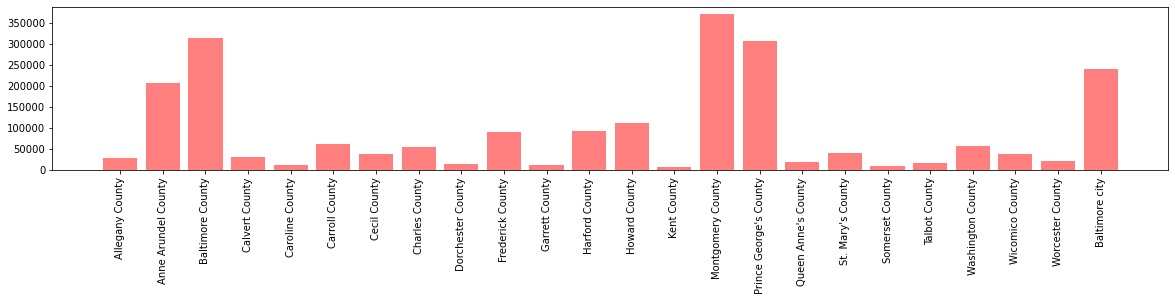

In [21]:
# Create a list indicating where to write x labels and set fgire size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, MD_df['total_households'], color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, MD_df['county_name'], rotation='vertical')

In [22]:
# filter the df down only to those columns to chart
county_and_total_household = MD_df[['county_name', 'total_households']]

# set the index to "jurisdiction" so they will be used as labels
county_and_total_household = county_and_total_household.set_index('county_name')

county_and_total_household.head()

,total_households
county_name,
Allegany County,27759
Anne Arundel County,205395
Baltimore County,312859
Calvert County,31462
Caroline County,11996


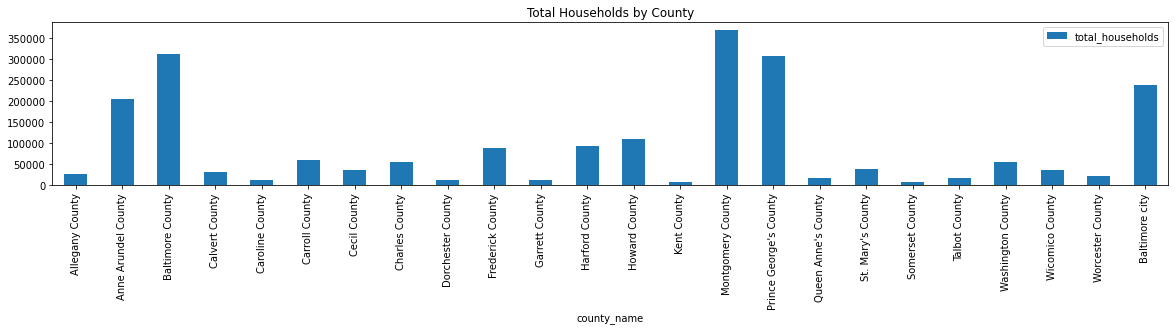

<Figure size 432x288 with 0 Axes>

In [23]:
# Use df.plot() in order to create a bar chart of the data
county_and_total_household.plot(kind='bar', figsize=(20,3))

# Set a title for the chart
plt.title("Total Households by County")

plt.show()
plt.tight_layout()

In [24]:
MD_df.to_csv('MD_df.csv', index=False)
MD_df

,county_name,total_households,median_household_income,families,total_population,male,female
0,Allegany County,27759,42771,17126,72591,37892,34699
1,Anne Arundel County,205395,94502,142696,564600,279581,285019
2,Baltimore County,312859,71810,204288,828637,392930,435707
3,Calvert County,31462,100350,23759,90824,45184,45640
4,Caroline County,11996,52469,8670,32785,15971,16814
5,Carroll County,60432,90510,45399,167319,82784,84535
6,Cecil County,37076,70516,26121,102416,50878,51538
7,Charles County,54988,93973,40303,156021,75368,80653
8,Dorchester County,12940,50532,8539,32386,15476,16910
9,Frederick County,90022,88502,65073,246105,121305,124800
